Classification Project
Why are our customers churning?

Some questions I have include:

Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers))
Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?
Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?
If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

### Deliverables:

I will also need a report (ipynb) answering the question, "Why are our customers churning?" I want to see the analysis you did to answer my questions and lead to your findings. Please clearly call out the questions and answers you are analyzing. E.g. If you find that month-to-month customers churn more, I won't be surprised, but I am not getting rid of that plan. The fact that they churn is not because they can, it's because they can and they are motivated to do so. I want some insight into why they are motivated to do so. I realize you will not be able to do a full causal experiment, but I hope to see some solid evidence of your conclusions.

I will need you to deliver to me a csv with the customer_id, probability of churn, and the prediction of churn (1=churn, 0=not_churn). I would also like a single goolgle slide that illustrates how your model works, including the features being used, so that I can deliver this to the SLT when they come with questions about how these values were derived. Please make sure you include how likely your model is to give a high probability of churn when churn doesn't occur, to give a low probability of churn when churn occurs, and to accurately predict churn.

Finally, our development team will need a .py file that will take in a new dataset, (in the exact same form of the one you acquired from telco_churn.customers) and perform all the transformations necessary to run the model you have developed on this new dataset to provide probabilities and predictions.

Specification
Detailed instructions for each section are below.

In general, make sure you document your work. You don't need to explain what every line of code is doing, but you should explain what and why you are doing. For example, if you drop a feature from the dataset, you should explain why you decided to do so, or why that is a reasonable thing to do. If you transform the data in a column, you should explain why you are making that transformation.

In addition, you should not present numers in isolation. If your code outputs a number, be sure you give some context to the number.

### Specific Deliverables:

- a jupyter notebook where your work takes place
- a csv file that predicts churn for each customer
- a python script that prepares data such that it can be fed into your model
- a google slide summarizing your model
- a README.md file that contains a link to your google slides presentation, and instructions for how to use your python script(s)

# Acquisition
Get the data from the customers table from the telco_churn database on the codeup data science database server.

You may wish to join some tables as part of your query.
This data should end up in a pandas data frame.

In [247]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

import scipy.stats as stats
from scipy.stats import pearsonr

import graphviz
from graphviz import Graph

from telco_prepare import peekatdata

import env

In [2]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_telco_data():
    return pd.read_sql('SELECT c.*, ct.contract_type, ist.internet_service_type, pt.payment_type\
    FROM customers as c\
    JOIN contract_types as ct USING (contract_type_id)\
    JOIN internet_service_types as ist USING (internet_service_type_id)\
    JOIN payment_types as pt USING (payment_type_id);', get_connection('telco_churn'))

In [3]:
df = get_telco_data()
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,1,Yes,4,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,1,Yes,1,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,No,1,Yes,1,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,No,1,No,3,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


Write a function, peekatdata(dataframe), that takes a dataframe as input and computes and returns the following:

- creates dataframe object head_df (df of the first 5 rows) and prints contents to screen
- creates dataframe object tail_df (df of the last 5 rows) and prints contents to screen
- creates tuple object shape_tuple (tuple of (nrows, ncols)) and prints tuple to screen
- creates dataframe object describe_df (summary statistics of all numeric variables) and prints contents to screen.
- prints to screen the information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [4]:
# def peekatdata(dataframe):
    
#     print('df head:')
#     print(dataframe.head())
    
#     print('df tail:')
#     print(dataframe.tail())
    
#     print('df shape:')
#     print(dataframe.shape)
    
#     print('df described:')
#     print(dataframe.describe())
    

# #     index_dtype = 
# #     return index_dtype

#     print('df types:')
#     print(dataframe.dtypes)
    
# peekatdata(df)

In [5]:
# def df_head(dataframe):
    
# #     print('df head:')
#     return dataframe.head()

# def df_tail(dataframe):    
# #     print('df tail:')
#     return dataframe.tail()
    
# def df_shape(dataframe):
# #     print('df shape:')
#     return dataframe.shape

# def df_describe(dataframe):
# #     print('df described:')
#     return dataframe.describe()
    

# # #     index_dtype = 
# # #     return index_dtype

# def df_types(dataframe):
# #     print('df types:')
#     return dataframe.dtypes

# def peekatdata(dataframe):
#     peekatda = df\
#         .pipe(df_head)\
#         .pipe(df_tail)\
#         .pipe(df_describe)\
#         .pipe(df_types)
# #         .pipe(df_shape)\
        
#     return peekatda

In [6]:
from telco_prepare import df_head

In [7]:
df_head(df)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,1,Yes,4,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,1,Yes,1,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,No,1,Yes,1,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,No,1,No,3,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [8]:
from telco_prepare import df_tail
df_tail(df)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
7038,9950-MTGYX,Male,0,Yes,Yes,28,Yes,No,3,No internet service,...,No internet service,3,Yes,4,20.30,487.95,No,Two year,None,Credit card (automatic)
7039,9953-ZMKSM,Male,0,No,No,63,Yes,Yes,3,No internet service,...,No internet service,3,No,2,25.25,1559.3,No,Two year,None,Mailed check
7040,9964-WBQDJ,Female,0,Yes,No,71,Yes,Yes,3,No internet service,...,No internet service,3,Yes,4,24.40,1725.4,No,Two year,None,Credit card (automatic)
7041,9972-EWRJS,Female,0,Yes,Yes,67,Yes,No,3,No internet service,...,No internet service,3,Yes,3,19.25,1372.9,No,Two year,None,Bank transfer (automatic)
7042,9975-GPKZU,Male,0,Yes,Yes,46,Yes,No,3,No internet service,...,No internet service,3,No,4,19.75,856.5,No,Two year,None,Credit card (automatic)


In [9]:
from telco_prepare import df_shape
df_shape(df)

(7043, 24)

In [10]:
from telco_prepare import df_describe
df_describe(df)

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000


In [14]:
from telco_prepare import df_types
df_types(df)

customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

In [13]:
peekatdata(df)

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges
count,5.000000,5.00000,5.0,5.0,5.00000,5.000000
mean,0.400000,5.40000,1.0,1.0,2.20000,46.620000
std,0.547723,4.09878,0.0,0.0,1.30384,18.846405
min,0.000000,1.00000,1.0,1.0,1.00000,25.100000
25%,0.000000,1.00000,1.0,1.0,1.00000,30.500000
50%,0.000000,7.00000,1.0,1.0,2.00000,48.200000
75%,1.000000,9.00000,1.0,1.0,3.00000,59.900000
max,1.000000,9.00000,1.0,1.0,4.00000,69.400000


# Data Prep

Write a function, df_value_counts(dataframe), that takes a dataframe as input and computes and returns the values by frequency for each column. The function should decide whether or not to bin the data for the value counts.

In [17]:
# Need to update with decision to bin.  Function below will give us the features with more than 10 different options, which will be the features we bin.
def df_value_counts(dataframe):
    df_cols = dataframe.columns
    for col in df_cols:
        print('-----%s-----' %col)
        print(df[col].value_counts())
        
df_value_counts(df)

-----customer_id-----
0623-EJQEG    1
0219-QAERP    1
2402-TAIRZ    1
4957-TREIR    1
8208-EUMTE    1
7766-CLTIC    1
1506-YJTYT    1
4719-UMSIY    1
4933-IKULF    1
2428-ZMCTB    1
1261-FWTTE    1
7696-AMHOD    1
6969-MVBAI    1
3400-ESFUW    1
5376-PCKNB    1
0133-BMFZO    1
0962-CQPWQ    1
3716-UVSPD    1
7009-LGECI    1
4897-QSUYC    1
5569-OUICF    1
4514-GFCFI    1
5493-SDRDQ    1
3398-FSHON    1
4129-LYCOI    1
4612-SSVHJ    1
8204-YJCLA    1
7137-RYLPP    1
7011-CVEUC    1
9851-QXEEQ    1
             ..
5382-TEMLV    1
7295-JOMMD    1
8128-YVJRG    1
6711-VTNRE    1
5227-JSCFE    1
5091-HFAZW    1
3976-NLDEZ    1
4806-HIPDW    1
6919-ELBGL    1
9885-CSMWE    1
6993-OHLXR    1
7785-RDVIG    1
4456-RHSNB    1
9992-UJOEL    1
6771-XWBDM    1
3926-CUQZX    1
8181-YHCMF    1
3428-MMGUB    1
3621-CHYVB    1
2121-JAFOM    1
1017-FBQMM    1
5553-AOINX    1
6229-UOLQL    1
3519-ZKXGG    1
4826-TZEVA    1
3704-IEAXF    1
1623-NLDOT    1
6620-JDYNW    1
6048-NJXHX    1
3082-VQXNH    1
Na

In [18]:
def df_value_counts_bin(dataframe):
    df_cols = dataframe.columns
    features_to_bin = []
    for col in df_cols:
#         print('-----%s-----' %col)
#         print(df[col].value_counts())
        if df[col].value_counts().count() > 10:
            features_to_bin.append(col)
        print(features_to_bin[-1:])
        
df_value_counts_bin(df)

['customer_id']
['customer_id']
['customer_id']
['customer_id']
['customer_id']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['tenure']
['monthly_charges']
['total_charges']
['total_charges']
['total_charges']
['total_charges']
['total_charges']
['tenure_year']


### Handle Missing Values

Explore the data and see if there are any missing values.

Write a function that accepts a dataframe and returns the names of the columns that have missing values, and the percent of missing values in each column that has missing values.

In [19]:
def missing_values(dataframe):
    df_cols = df.columns
    col_name = []
    null_values = []
    null_percents = []
    for col in df_cols:
        value = df[col].isnull().sum()
        null_percent = value / df[col].count()
        col_name.append(col)
        null_values.append(value)
        null_percents.append(null_percent)

    null_tuples = list(zip(col_name, null_values, null_percents))
    null_df = pd.DataFrame(null_tuples, columns = ['Feature', 'Null_Count', 'Null_Percent'])

    print(type(null_df))
    print(null_df)  
    
missing_values(df)

<class 'pandas.core.frame.DataFrame'>
                     Feature  Null_Count  Null_Percent
0                customer_id           0           0.0
1                     gender           0           0.0
2             senior_citizen           0           0.0
3                    partner           0           0.0
4                 dependents           0           0.0
5                     tenure           0           0.0
6              phone_service           0           0.0
7             multiple_lines           0           0.0
8   internet_service_type_id           0           0.0
9            online_security           0           0.0
10             online_backup           0           0.0
11         device_protection           0           0.0
12              tech_support           0           0.0
13              streaming_tv           0           0.0
14          streaming_movies           0           0.0
15          contract_type_id           0           0.0
16         paperless_billin

In [20]:
missing_values(df)

<class 'pandas.core.frame.DataFrame'>
                     Feature  Null_Count  Null_Percent
0                customer_id           0           0.0
1                     gender           0           0.0
2             senior_citizen           0           0.0
3                    partner           0           0.0
4                 dependents           0           0.0
5                     tenure           0           0.0
6              phone_service           0           0.0
7             multiple_lines           0           0.0
8   internet_service_type_id           0           0.0
9            online_security           0           0.0
10             online_backup           0           0.0
11         device_protection           0           0.0
12              tech_support           0           0.0
13              streaming_tv           0           0.0
14          streaming_movies           0           0.0
15          contract_type_id           0           0.0
16         paperless_billin

The function below will sort each column and output the head and tail for that column.  This will let us see if there's something fishy about any of data in each column.

In [21]:
def sort_col_val(dataframe):
    df_cols = dataframe.columns
    for col in df_cols:
        print('Sorted by ' + str(col) + ':')
        print('Head:')
        print(df[[col]].sort_values(by=[col]).head().T)
        print(' ')
        print('Tail: ')
        print(df[[col]].sort_values(by=[col]).tail().T)
        print('-----')

In [22]:
sort_col_val(df)

Sorted by customer_id:
Head:
                   1223        0           2421        2422        2423
customer_id  0002-ORFBO  0003-MKNFE  0004-TLHLJ  0011-IGKFF  0013-EXCHZ
 
Tail: 
                   1792        4548        1222        2419        2420
customer_id  9987-LUTYD  9992-RRAMN  9992-UJOEL  9993-LHIEB  9995-HOTOH
-----
Sorted by gender:
Head:
          3521    5577    2895    2897    2899
gender  Female  Female  Female  Female  Female
 
Tail: 
        3095  3094  3092  3122  7042
gender  Male  Male  Male  Male  Male
-----
Sorted by senior_citizen:
Head:
                0     4703  4702  4701  4700
senior_citizen     0     0     0     0     0
 
Tail: 
                4542  4540  4537  2259  5117
senior_citizen     1     1     1     1     1
-----
Sorted by partner:
Head:
        0    3776 3775 3773 3772
partner   No   No   No   No   No
 
Tail: 
        4104 1385 4107 4087 7042
partner  Yes  Yes  Yes  Yes  Yes
-----
Sorted by dependents:
Head:
           0    4065 4063 4062 406

Looking at the above output, something seems odd about the lower end of total_charges.  Below, I am checking for values that are whitespace, or ' '.  We have 11 rows without an actual amount in total_charges.

In [23]:
df['total_charges'].replace(' ', (df['monthly_charges'] * df['tenure']), inplace=True)

In [24]:
df.loc[(df['total_charges'] == ' ')].T

""
customer_id
gender
senior_citizen
partner
dependents
tenure
phone_service
multiple_lines
internet_service_type_id
online_security


We are now showing no empty cells.  Let's do a value_count to if anything strange is in our list now.  They are showing as 0.0 now.  Let's convert the total_charges column to a float and then drop these rows.

In [25]:
df_value_counts(df)

-----customer_id-----
0623-EJQEG    1
0219-QAERP    1
2402-TAIRZ    1
4957-TREIR    1
8208-EUMTE    1
7766-CLTIC    1
1506-YJTYT    1
4719-UMSIY    1
4933-IKULF    1
2428-ZMCTB    1
1261-FWTTE    1
7696-AMHOD    1
6969-MVBAI    1
3400-ESFUW    1
5376-PCKNB    1
0133-BMFZO    1
0962-CQPWQ    1
3716-UVSPD    1
7009-LGECI    1
4897-QSUYC    1
5569-OUICF    1
4514-GFCFI    1
5493-SDRDQ    1
3398-FSHON    1
4129-LYCOI    1
4612-SSVHJ    1
8204-YJCLA    1
7137-RYLPP    1
7011-CVEUC    1
9851-QXEEQ    1
             ..
5382-TEMLV    1
7295-JOMMD    1
8128-YVJRG    1
6711-VTNRE    1
5227-JSCFE    1
5091-HFAZW    1
3976-NLDEZ    1
4806-HIPDW    1
6919-ELBGL    1
9885-CSMWE    1
6993-OHLXR    1
7785-RDVIG    1
4456-RHSNB    1
9992-UJOEL    1
6771-XWBDM    1
3926-CUQZX    1
8181-YHCMF    1
3428-MMGUB    1
3621-CHYVB    1
2121-JAFOM    1
1017-FBQMM    1
5553-AOINX    1
6229-UOLQL    1
3519-ZKXGG    1
4826-TZEVA    1
3704-IEAXF    1
1623-NLDOT    1
6620-JDYNW    1
6048-NJXHX    1
3082-VQXNH    1
Na

In [26]:
df['total_charges'] = df['total_charges'].convert_objects(convert_numeric=True)
df.dtypes

customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
internet_service_type_id      int64
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
contract_type_id              int64
paperless_billing            object
payment_type_id               int64
monthly_charges             float64
total_charges               float64
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
tenure_year                 float64
dtype: object

Success!  Total_charges is now a float.  Let's drop the rows with 0.0.

In [27]:
df = df.drop(df[df.total_charges == 0].index)

In [28]:
df.sort_values(by=['total_charges']).head().T

,6145,6010,5989,6039,5589
customer_id,2967-MXRAV,9318-NKNFC,8992-CEUEN,9975-SKRNR,1423-BMPBQ
gender,Male,Male,Female,Male,Female
senior_citizen,0,0,0,0,0
partner,Yes,No,No,No,Yes
dependents,Yes,No,No,No,Yes
tenure,1,1,1,1,1
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,No,No,No,No
internet_service_type_id,3,3,3,3,3
online_security,No internet service,No internet service,No internet service,No internet service,No internet service


Let's create a feature that calculates estimated total_charges based on tenure * monthly_charges and gives us a percentage vs. the actual total_charges.  This will be used to check for data integrity issues.

In [29]:
df['percent_var_tc_from_act_tc'] = (df['monthly_charges'] * df['tenure']) / df['total_charges']

In [30]:
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,tenure_year,percent_var_tc_from_act_tc
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,1.872582,1.688567,2.315557,64.798208,2283.300441,2.701816,1.002311
std,0.368844,24.545260,0.737271,0.832934,1.149523,30.085974,2266.771362,2.045438,0.051288
min,0.000000,1.000000,1.000000,1.000000,1.000000,18.250000,18.800000,0.083333,0.635545
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.587500,401.450000,0.750000,0.980813
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1397.475000,2.416667,1.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.862500,3794.737500,4.583333,1.020881
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,8684.800000,6.000000,1.450628


To make things a little clearer, let's reorganize the columns so the new columns created are closer to the columns they represent/interact with.

Document your takeaways. For each variable:

- should you remove the observations with a missing value for that variable?
- should you remove the variable altogether?
- is missing equivalent to 0 (or some other constant value) in the specific case of this variable?
- should you replace the missing values with a value it is most likely to represent (e.g. Are the missing values a - result of data integrity issues and should be replaced by the most likely value?)
- Handle the missing values in the way you recommended above.

Transform churn such that "yes" = 1 and "no" = 0

In [44]:
def encode_churn(df):
    encoder = LabelEncoder()
    encoder.fit(df.churn)
    return df.assign(churn_encoded = encoder.transform(df.churn))

In [47]:
df = encode_churn(df)

In [48]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_year,percent_var_tc_from_act_tc,churn_encoded
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.9,542.40,No,Month-to-month,DSL,Mailed check,0.750000,0.993916,0
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,4,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic),0.750000,1.093009,0
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,1,48.2,340.35,No,Month-to-month,DSL,Electronic check,0.583333,0.991332,0
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,1,25.1,25.10,Yes,Month-to-month,DSL,Electronic check,0.083333,1.000000,1
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,3,30.5,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic),0.083333,1.000000,1


Compute a new feature, tenure_year, that is a result of translating tenure from months to years.

In [49]:
def create_tenure_year(df):
    df[['tenure_year']] = df[['tenure']] / 12
    return df

In [50]:
create_tenure_year(df)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_year,percent_var_tc_from_act_tc,churn_encoded
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.90,542.40,No,Month-to-month,DSL,Mailed check,0.750000,0.993916,0
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,4,69.40,571.45,No,Month-to-month,DSL,Credit card (automatic),0.750000,1.093009,0
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,1,48.20,340.35,No,Month-to-month,DSL,Electronic check,0.583333,0.991332,0
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,1,25.10,25.10,Yes,Month-to-month,DSL,Electronic check,0.083333,1.000000,1
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,3,30.50,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic),0.083333,1.000000,1
5,0067-DKWBL,Male,1,No,No,2,Yes,No,1,Yes,...,1,49.25,91.10,Yes,Month-to-month,DSL,Electronic check,0.166667,1.081229,1
6,0076-LVEPS,Male,0,No,Yes,29,No,No phone service,1,Yes,...,2,45.00,1242.45,No,Month-to-month,DSL,Mailed check,2.416667,1.050344,0
7,0082-LDZUE,Male,0,No,No,1,Yes,No,1,No,...,2,44.30,44.30,No,Month-to-month,DSL,Mailed check,0.083333,1.000000,0
8,0096-BXERS,Female,0,Yes,No,6,Yes,Yes,1,No,...,1,50.35,314.55,No,Month-to-month,DSL,Electronic check,0.500000,0.960420,0
9,0096-FCPUF,Male,0,No,No,30,Yes,Yes,1,Yes,...,2,64.50,1888.45,No,Month-to-month,DSL,Mailed check,2.500000,1.024650,0


### Creating a new feature that will bin the tenure years into int's.

In [228]:
df[['tenure_yr_int']] = df[['tenure_year']].astype(int)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_year,percent_var_tc_from_act_tc,churn_encoded,tenure_yr_int
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,59.9,542.40,No,Month-to-month,DSL,Mailed check,0.750000,0.993916,0,0
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic),0.750000,1.093009,0,0
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,48.2,340.35,No,Month-to-month,DSL,Electronic check,0.583333,0.991332,0,0
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,25.1,25.10,Yes,Month-to-month,DSL,Electronic check,0.083333,1.000000,1,0
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,30.5,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic),0.083333,1.000000,1,0


In [255]:
df[['monthly_charges_binned']] = df[['monthly_charges']]
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_year,percent_var_tc_from_act_tc,churn_encoded,tenure_yr_int,monthly_charges_binned
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,542.40,No,Month-to-month,DSL,Mailed check,0.750000,0.993916,0,0,59.9
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,571.45,No,Month-to-month,DSL,Credit card (automatic),0.750000,1.093009,0,0,69.4
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,340.35,No,Month-to-month,DSL,Electronic check,0.583333,0.991332,0,0,48.2
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,25.10,Yes,Month-to-month,DSL,Electronic check,0.083333,1.000000,1,0,25.1
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic),0.083333,1.000000,1,0,30.5


In [259]:
bins = [15,40, 50, 60, 70, 80, 90, 100, 140]
labels = [1,2,3,4,5,6,7,8]
df['monthly_charges_binned'] = pd.cut(df['monthly_charges'], bins=bins, labels=labels)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_year,percent_var_tc_from_act_tc,churn_encoded,tenure_yr_int,monthly_charges_binned
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,542.40,No,Month-to-month,DSL,Mailed check,0.750000,0.993916,0,0,3
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,571.45,No,Month-to-month,DSL,Credit card (automatic),0.750000,1.093009,0,0,4
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,340.35,No,Month-to-month,DSL,Electronic check,0.583333,0.991332,0,0,2
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,25.10,Yes,Month-to-month,DSL,Electronic check,0.083333,1.000000,1,0,1
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic),0.083333,1.000000,1,0,1


Figure out a way to capture the information contained in phone_service and multiple_lines into a single variable of dtype int. Write a function that will transform the data and place in a new column named phone_id.

Figure out a way to capture the information contained in dependents and partner into a single variable of dtype int. Transform the data and place in a new column household_type_id.

Figure out a way to capture the information contained in streaming_tv and streaming_movies into a single variable of dtype int. Transform the data and place in a new column streaming_services.

Figure out a way to capture the information contained in online_security and online_backup into a single variable of dtype int. Transform the data and place in a new column online_security_backup.

Split the data into train (70%) & test (30%) samples.

In [260]:
list(df)

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service_type_id',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type_id',
 'paperless_billing',
 'payment_type_id',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'tenure_year',
 'percent_var_tc_from_act_tc',
 'churn_encoded',
 'tenure_yr_int',
 'monthly_charges_binned']

In [261]:
X = df.drop(['churn', 'churn_encoded'], axis=1)
y = df[['churn_encoded']]

### End of Data Prep

In [262]:
train, test = train_test_split(df, random_state=123)

In [263]:
train.shape

(5274, 29)

In [264]:
test.shape

(1758, 29)

In [265]:
scaler = MinMaxScaler()

In [266]:
scaler.fit(X_train[['monthly_charges', 'total_charges']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [267]:
train[['monthly_charges', 'total_charges']] = scaler.transform(train[['monthly_charges', 'total_charges']])
test[['monthly_charges', 'total_charges']] = scaler.transform(test[['monthly_charges', 'total_charges']])
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,total_charges,churn,contract_type,internet_service_type,payment_type,tenure_year,percent_var_tc_from_act_tc,churn_encoded,tenure_yr_int,monthly_charges_binned
1977,3249-VHRIP,Female,0,No,No,62,No,No phone service,1,No,...,0.315916,No,Two year,DSL,Credit card (automatic),5.166667,0.983447,0,5,2
5481,9174-IHETN,Female,0,No,Yes,50,Yes,No,2,No,...,0.406747,No,Two year,Fiber optic,Credit card (automatic),4.166667,0.995444,0,4,5
198,1740-CSDJP,Male,0,No,No,1,No,No phone service,1,No,...,0.001907,Yes,Month-to-month,DSL,Bank transfer (automatic),0.083333,1.000000,1,0,1
6323,7649-PHJVR,Male,0,No,No,11,Yes,No,3,No internet service,...,0.024074,No,One year,None,Mailed check,0.916667,0.945767,0,0,1
1300,1301-LOPVR,Male,0,Yes,Yes,29,No,No phone service,1,Yes,...,0.187260,No,One year,DSL,Credit card (automatic),2.416667,0.980574,0,2,3


In [268]:
X_train = train.drop(['churn', 'churn_encoded'], axis=1)
X_test = test.drop(['churn', 'churn_encoded'], axis=1)
y_train = train[['churn_encoded']]
y_test = test[['churn_encoded']]

Variable Encoding: encode the values in each non-numeric feature such that they are numeric.

Numeric Scaling: scale the monthly_charges and total_charges data. Make sure that the parameters for scaling are learned from the training data set.

# Data Exploration
Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers)).

Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?

Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?

If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? (Use a t-test to answer this.)

How much of monthly_charges can be explained by internet_service_type? (hint: correlation test). State your hypotheses and your conclusion clearly.

How much of monthly_charges can be explained by internet_service_type + phone service type (0, 1, or multiple lines). State your hypotheses and your conclusion clearly.

Create visualizations exploring the interactions of variables (independent with independent and independent with dependent). The goal is to identify features that are related to churn, identify any data integrity issues, understand 'how the data works'. For example, we may find that all who have online services also have device protection. In that case, we don't need both of those. (The visualizations done in your analysis for questions 1-5 count towards the requirements below)

Each independent variable (except for customer_id) should be visualized in at least two plots, and at least 1 of those compares the independent variable with the dependent variable.

For each plot where x and y are independent variables, add a third dimension (where possible), of churn represented by color.

Use subplots when plotting the same type of chart but with different variables.

Adjust the axes as necessary to extract information from the visualizations (adjusting the x & y limits, setting the scale where needed, etc.)

Add annotations to at least 5 plots with a key takeaway from that plot.

Use plots from matplotlib, pandas and seaborn.

Use each of the following:

sns.heatmap

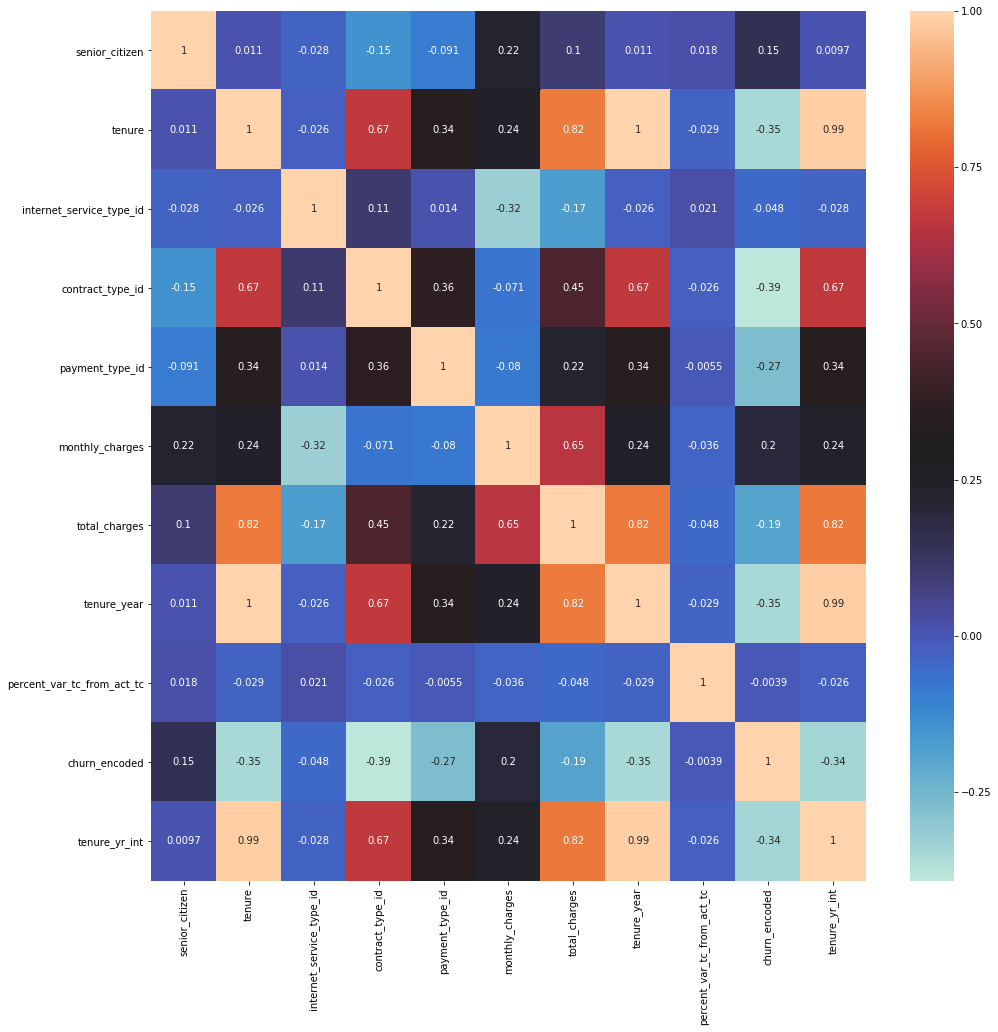

In [269]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr(), cmap='icefire', annot=True)

pd.crosstab (along with sns.heatmap)

pd.scatter_matrix

sns.barplot

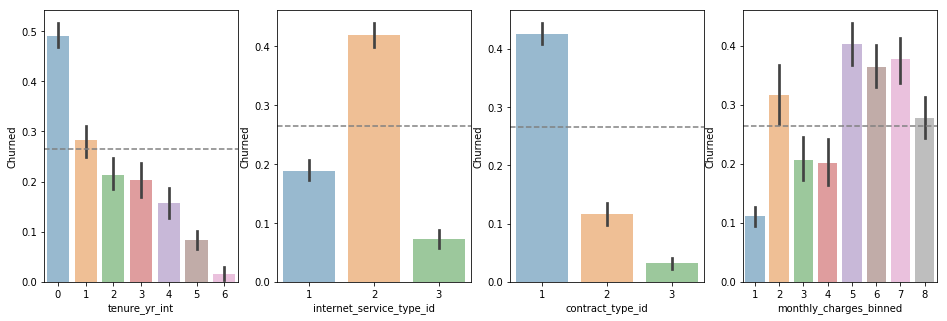

In [270]:
features = ['tenure_yr_int', 'internet_service_type_id', 'contract_type_id', 'monthly_charges_binned']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churned_rate = train.churn_encoded.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churned')
    ax[i].axhline(churned_rate, ls='--', color='grey')
    

These plots show that customers that have not yet reached 1 year of tenure churn more.  Customers with fiber churn more.  Month-to-month customers are churning more.  Finally, the customers with the higher monthly charges are churning more frequently.

sns.swarmplot

sns.pairplot

sns.jointplot

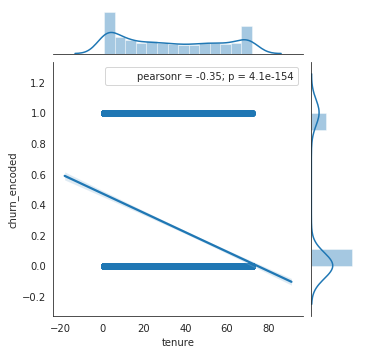

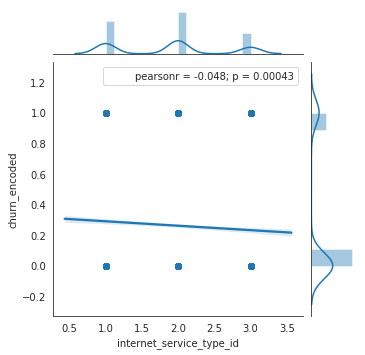

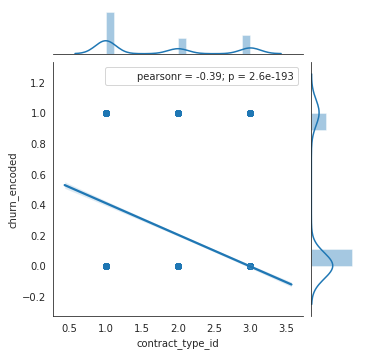

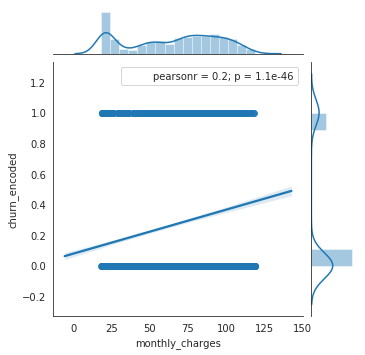

In [248]:
for i, col in enumerate(['tenure', 'internet_service_type_id', 'contract_type_id', 'monthly_charges']):
    with sns.axes_style('white'):
        plot_number = i + 1
        series = train[col]
        j = sns.jointplot(train[col], 'churn_encoded', data=train, kind='reg', height=5)
        j.annotate(stats.pearsonr)

sns.relplot or plt.scatter

sns.distplot or plt.hist

sns.boxplot

plt.plot

In [242]:
train.dtypes

customer_id                    object
gender                         object
senior_citizen                  int64
partner                        object
dependents                     object
tenure                          int64
phone_service                  object
multiple_lines                 object
internet_service_type_id        int64
online_security                object
online_backup                  object
device_protection              object
tech_support                   object
streaming_tv                   object
streaming_movies               object
contract_type_id                int64
paperless_billing              object
payment_type_id                 int64
monthly_charges               float64
total_charges                 float64
churn                          object
contract_type                  object
internet_service_type          object
payment_type                   object
tenure_year                   float64
percent_var_tc_from_act_tc    float64
churn_encode

Use at least one more type of plot that is not included in the list above.

What can you say about each variable's relationship to churn, based on your initial exploration? If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.

Summarize your conclusions, provide clear answers to the specific questions, and summarize any takeaways/action plan from the work above.

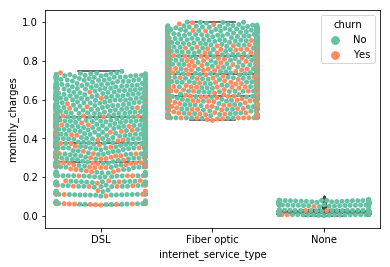

In [211]:
sns.swarmplot(x="internet_service_type", y="monthly_charges", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="internet_service_type", y="monthly_charges", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

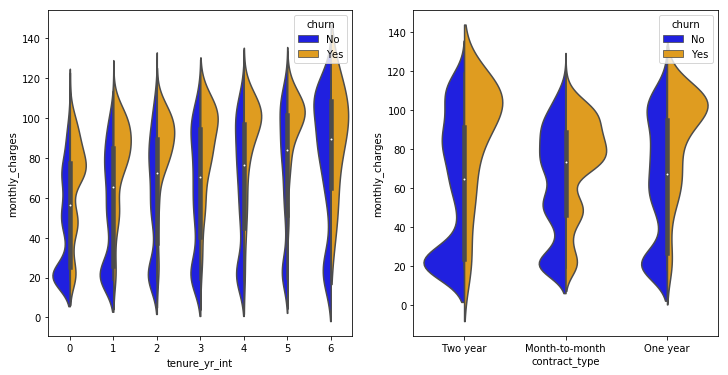

In [236]:
features = ['tenure_yr_int', 'contract_type']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'monthly_charges', hue='churn',
        data=train, split=True, ax=ax[i], palette=['blue','orange'])

The plots above show that higher monthly charges are a good indicator of customer that are churning.  This is consistent across tenure years and contract type.

In [ ]:
features = ['tenure_yr_int', 'contract_type']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'monthly_charges', hue='churn',
        data=train, split=True, ax=ax[i], palette=['blue','orange'])

# Modeling
Feature Selection: Are there any variables that seem to provide limited to no additional information? If so, remove them.

Train (fit, transform, evaluate) multiple different models, varying the model type and your meta-parameters.

In [60]:
list(df)

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service_type_id',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type_id',
 'paperless_billing',
 'payment_type_id',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'tenure_year',
 'percent_var_tc_from_act_tc',
 'churn_encoded']

# Models
## Random Forests

In [147]:
def analyze_rf_binomial(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, min_sample_leaf_input, max_depth_input):
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as max depth level and ' +str(min_sample_leaf_input) + ' as the min_sample_leaf.')
    print('The features being used: ' + str(features))
    print('-----')

    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion=string_criterion,
                            min_samples_leaf=min_sample_leaf_input,
                            n_estimators=100,
                            max_depth=max_depth_input, 
                            random_state=123)

    rf.fit(X_df_train, y_df_train)

    y_df_pred = rf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = rf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')

    print('Accuracy of rf classifier on training set: {:.8f}'.format(rf.score(X_df_train, y_df_train)))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = rf.predict(X_df_test)
    y_df_pred_proba_test = rf.predict_proba(X_df_test)
    print('Accuracy of RF classifier on train set: {:.6f}'
     .format(rf.score(X_df_train, y_df_train)))
    print('-----')
    

In [148]:
X_rf_1_train = X_train[['tenure_year', 'monthly_charges', 'internet_service_type_id']]
X_rf_1_test = X_test[['tenure_year', 'monthly_charges', 'internet_service_type_id']]

In [302]:
analyze_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 5, 6)

Results using entropy as the measure of impurity and 6 as max depth level and 5 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.72705315 0.27294685]
 [0.76115204 0.23884796]
 [0.6989759  0.3010241 ]
 [0.64063607 0.35936393]
 [0.74747136 0.25252864]]
-----
Accuracy of rf classifier on training set: 0.73549488
-----
          Pred -  Pred +
Actual -    3875       2
Actual +    1393       4
-----
              precision    recall  f1-score   support

           0     0.7356    0.9995    0.8475      3877
           1     0.6667    0.0029    0.0057      1397

   micro avg     0.7355    0.7355    0.7355      5274
   macro avg     0.7011    0.5012    0.4266      5274
weighted avg     0.7173    0.7355    0.6245      5274

-----
Accuracy of RF classifier on train set: 0.735495
-----


In [304]:
analyze_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 8, 8)

Results using entropy as the measure of impurity and 8 as max depth level and 8 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.73218243 0.26781757]
 [0.77086459 0.22913541]
 [0.6780741  0.3219259 ]
 [0.62821073 0.37178927]
 [0.75486363 0.24513637]]
-----
Accuracy of rf classifier on training set: 0.73549488
-----
          Pred -  Pred +
Actual -    3875       2
Actual +    1393       4
-----
              precision    recall  f1-score   support

           0     0.7356    0.9995    0.8475      3877
           1     0.6667    0.0029    0.0057      1397

   micro avg     0.7355    0.7355    0.7355      5274
   macro avg     0.7011    0.5012    0.4266      5274
weighted avg     0.7173    0.7355    0.6245      5274

-----
Accuracy of RF classifier on train set: 0.735495
-----


## Best performing model on train, also did well on test.

In [284]:
analyze_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 4, 8)

Results using entropy as the measure of impurity and 8 as max depth level and 4 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.72086349 0.27913651]
 [0.78405988 0.21594012]
 [0.69418889 0.30581111]
 [0.63714151 0.36285849]
 [0.77956241 0.22043759]]
-----
Accuracy of rf classifier on training set: 0.73682215
-----
          Pred -  Pred +
Actual -    3875       2
Actual +    1386      11
-----
              precision    recall  f1-score   support

           0     0.7366    0.9995    0.8481      3877
           1     0.8462    0.0079    0.0156      1397

   micro avg     0.7368    0.7368    0.7368      5274
   macro avg     0.7914    0.5037    0.4319      5274
weighted avg     0.7656    0.7368    0.6276      5274

-----
Accuracy of RF classifier on train set: 0.736822
-----


## Test on RF model that performed best on train set.

In [286]:
def test_rf_binomial(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, min_sample_leaf_input, max_depth_input):
    features = list(X_df_train)
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as max depth level and ' +str(min_sample_leaf_input) + ' as the min_sample_leaf.')
    print('The features being used: ' + str(features))
    print('-----')

    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion=string_criterion,
                            min_samples_leaf=min_sample_leaf_input,
                            n_estimators=100,
                            max_depth=max_depth_input, 
                            random_state=123)

    rf.fit(X_df_train, y_df_train)

    y_df_pred = rf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = rf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')

    print('Accuracy of rf classifier on training set: {:.8f}'.format(rf.score(X_df_train, y_df_train)))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = rf.predict(X_df_test)
    y_df_pred_proba_test = rf.predict_proba(X_df_test)

    print('-----')
    
    print('The results of running the model on the test sample:')
    
    cm = pd.DataFrame(confusion_matrix(y_df_test, y_df_pred_test),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_test, y_df_pred_test, digits=4))
    print('-----')
    
    y_df_pred_test = rf.predict(X_df_test)
    y_df_pred_proba_test = rf.predict_proba(X_df_test)
    print('-----')
    print('Head of probabilities on X_test:')
    print(y_df_pred_proba_test[:5])
    print('Accuracy of Logistic Regression classifier on test set: {:.6f}'
     .format(rf.score(X_df_test, y_df_test)))
    print('-----')
    Probabilities_on_X_test = y_df_pred_proba_test
    return Probabilities_on_X_test

In [303]:
test_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 4, 8)

Results using entropy as the measure of impurity and 8 as max depth level and 4 as the min_sample_leaf.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.72086349 0.27913651]
 [0.78405988 0.21594012]
 [0.69418889 0.30581111]
 [0.63714151 0.36285849]
 [0.77956241 0.22043759]]
-----
Accuracy of rf classifier on training set: 0.73682215
-----
          Pred -  Pred +
Actual -    3875       2
Actual +    1386      11
-----
              precision    recall  f1-score   support

           0     0.7366    0.9995    0.8481      3877
           1     0.8462    0.0079    0.0156      1397

   micro avg     0.7368    0.7368    0.7368      5274
   macro avg     0.7914    0.5037    0.4319      5274
weighted avg     0.7656    0.7368    0.6276      5274

-----
-----
The results of running the model on the test sample:
          Pred -  Pred +
Actual -    1285       1
Actua

array([[0.77335034, 0.22664966],
       [0.70837487, 0.29162513],
       [0.56524927, 0.43475073],
       ...,
       [0.69961161, 0.30038839],
       [0.72373444, 0.27626556],
       [0.76062942, 0.23937058]])

## Classification/Decision Tree

In [198]:
def analyze_classification_model(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, max_depth_input):   
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as the depth.')
    print('-----')

    clf = DecisionTreeClassifier(criterion=string_criterion, max_depth=max_depth_input, random_state=123)

    clf.fit(X_df_train, y_df_train)

    y_df_pred = clf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = clf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')

    print('Accuracy of Decision Tree classifier on training set: {:.8f}'.format(clf.score(X_df_train, y_df_train)))
    print('-----')

In [288]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'gini', 5)

Results using gini as the measure of impurity and 5 as the depth.
-----
Head of predicted on X_train:
[0 0 1 0 0]
-----
Head of probabilities on X_train:
[[0.7498253  0.2501747 ]
 [0.72400575 0.27599425]
 [0.45945946 0.54054054]
 [0.72400575 0.27599425]
 [0.7498253  0.2501747 ]]
-----
          Pred -  Pred +
Actual -    3855      22
Actual +    1360      37
-----
              precision    recall  f1-score   support

           0     0.7392    0.9943    0.8480      3877
           1     0.6271    0.0265    0.0508      1397

   micro avg     0.7380    0.7380    0.7380      5274
   macro avg     0.6832    0.5104    0.4494      5274
weighted avg     0.7095    0.7380    0.6368      5274

-----
Accuracy of Decision Tree classifier on training set: 0.73795980
-----


In [289]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'gini', 7)

Results using gini as the measure of impurity and 7 as the depth.
-----
Head of predicted on X_train:
[0 0 1 0 0]
-----
Head of probabilities on X_train:
[[0.7087846  0.2912154 ]
 [0.72458688 0.27541312]
 [0.41666667 0.58333333]
 [0.72458688 0.27541312]
 [0.7087846  0.2912154 ]]
-----
          Pred -  Pred +
Actual -    3865      12
Actual +    1350      47
-----
              precision    recall  f1-score   support

           0     0.7411    0.9969    0.8502      3877
           1     0.7966    0.0336    0.0646      1397

   micro avg     0.7418    0.7418    0.7418      5274
   macro avg     0.7689    0.5153    0.4574      5274
weighted avg     0.7558    0.7418    0.6421      5274

-----
Accuracy of Decision Tree classifier on training set: 0.74175199
-----


In [290]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 5)

Results using entropy as the measure of impurity and 5 as the depth.
-----
Head of predicted on X_train:
[0 0 1 0 0]
-----
Head of probabilities on X_train:
[[0.7350576  0.2649424 ]
 [0.7350576  0.2649424 ]
 [0.45945946 0.54054054]
 [0.7350576  0.2649424 ]
 [0.7350576  0.2649424 ]]
-----
          Pred -  Pred +
Actual -    3860      17
Actual +    1365      32
-----
              precision    recall  f1-score   support

           0     0.7388    0.9956    0.8482      3877
           1     0.6531    0.0229    0.0443      1397

   micro avg     0.7380    0.7380    0.7380      5274
   macro avg     0.6959    0.5093    0.4462      5274
weighted avg     0.7161    0.7380    0.6352      5274

-----
Accuracy of Decision Tree classifier on training set: 0.73795980
-----


In [291]:
analyze_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 7)

Results using entropy as the measure of impurity and 7 as the depth.
-----
Head of predicted on X_train:
[0 0 1 0 0]
-----
Head of probabilities on X_train:
[[0.73193642 0.26806358]
 [0.73193642 0.26806358]
 [0.41666667 0.58333333]
 [0.73193642 0.26806358]
 [0.73193642 0.26806358]]
-----
          Pred -  Pred +
Actual -    3867      10
Actual +    1356      41
-----
              precision    recall  f1-score   support

           0     0.7404    0.9974    0.8499      3877
           1     0.8039    0.0293    0.0566      1397

   micro avg     0.7410    0.7410    0.7410      5274
   macro avg     0.7722    0.5134    0.4533      5274
weighted avg     0.7572    0.7410    0.6398      5274

-----
Accuracy of Decision Tree classifier on training set: 0.74099355
-----


### We have done a little jumping around on running the models on the test data.  Let's try this model now to see how it compares.

In [312]:
def test_classification_model(X_df_train, X_df_test, y_df_train, y_df_test, string_criterion, max_depth_input):   
    
    print('Results using ' + str(string_criterion) + ' as the measure of impurity and ' + str(max_depth_input) + ' as the depth.')
    print('-----')

    clf = DecisionTreeClassifier(criterion=string_criterion, max_depth=max_depth_input, random_state=123)

    clf.fit(X_df_train, y_df_train)

    y_df_pred = clf.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = clf.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')

    print('Accuracy of Decision Tree classifier on training set: {:.8f}'.format(clf.score(X_df_train, y_df_train)))
    print('-----')    
    
    print('The results of running the model on the test sample:')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = clf.predict(X_df_test)
    y_df_pred_proba_test = clf.predict_proba(X_df_test)
    print('Accuracy of Logistic Regression classifier on test set: {:.6f}'
     .format(clf.score(X_df_test, y_df_test)))
    print('-----')

In [313]:
test_classification_model(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 7)

Results using entropy as the measure of impurity and 7 as the depth.
-----
Head of predicted on X_train:
[0 0 1 0 0]
-----
Head of probabilities on X_train:
[[0.73193642 0.26806358]
 [0.73193642 0.26806358]
 [0.41666667 0.58333333]
 [0.73193642 0.26806358]
 [0.73193642 0.26806358]]
-----
          Pred -  Pred +
Actual -    3867      10
Actual +    1356      41
-----
              precision    recall  f1-score   support

           0     0.7404    0.9974    0.8499      3877
           1     0.8039    0.0293    0.0566      1397

   micro avg     0.7410    0.7410    0.7410      5274
   macro avg     0.7722    0.5134    0.4533      5274
weighted avg     0.7572    0.7410    0.6398      5274

-----
Accuracy of Decision Tree classifier on training set: 0.74099355
-----
The results of running the model on the test sample:
          Pred -  Pred +
Actual -    3867      10
Actual +    1356      41
-----
              precision    recall  f1-score   support

           0     0.7404    0.9974    

## KNN

In [292]:
def analyze_knn_binomial(X_df_train, X_df_test, y_df_train, y_df_test, n_neighbor, weight):
    features = list(X_df_train)
    
    print('Results using ' + str(weight) + ' as the measure of impurity and ' + str(n_neighbor) + ' as the number of neighbors.')
    print('The features being used: ' + str(features))
    print('-----')

    knn = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight)

    knn.fit(X_df_train, y_df_train)

    y_df_pred = knn.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = knn.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')

    print('Accuracy of KNN classifier on training set: {:.8f}'.format(knn.score(X_df_train, y_df_train)))
    print('-----')

In [293]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'uniform')

Results using uniform as the measure of impurity and 5 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]]
-----
          Pred -  Pred +
Actual -    3633     244
Actual +     986     411
-----
              precision    recall  f1-score   support

           0     0.7865    0.9371    0.8552      3877
           1     0.6275    0.2942    0.4006      1397

   micro avg     0.7668    0.7668    0.7668      5274
   macro avg     0.7070    0.6156    0.6279      5274
weighted avg     0.7444    0.7668    0.7348      5274

-----
Accuracy of KNN classifier on training set: 0.76678043
-----


In [294]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 6, 'uniform')

Results using uniform as the measure of impurity and 6 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.66666667 0.33333333]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.83333333 0.16666667]]
-----
          Pred -  Pred +
Actual -    3797      80
Actual +    1216     181
-----
              precision    recall  f1-score   support

           0     0.7574    0.9794    0.8542      3877
           1     0.6935    0.1296    0.2183      1397

   micro avg     0.7543    0.7543    0.7543      5274
   macro avg     0.7255    0.5545    0.5363      5274
weighted avg     0.7405    0.7543    0.6858      5274

-----
Accuracy of KNN classifier on training set: 0.75426621
-----


In [305]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'distance')

Results using distance as the measure of impurity and 5 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.8        0.2       ]
 [1.         0.        ]]
-----
          Pred -  Pred +
Actual -    3868       9
Actual +     152    1245
-----
              precision    recall  f1-score   support

           0     0.9622    0.9977    0.9796      3877
           1     0.9928    0.8912    0.9393      1397

   micro avg     0.9695    0.9695    0.9695      5274
   macro avg     0.9775    0.9444    0.9594      5274
weighted avg     0.9703    0.9695    0.9689      5274

-----
Accuracy of KNN classifier on training set: 0.96947289
-----


In [306]:
analyze_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 6, 'distance')

Results using distance as the measure of impurity and 6 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [1.         0.        ]]
-----
          Pred -  Pred +
Actual -    3872       5
Actual +     155    1242
-----
              precision    recall  f1-score   support

           0     0.9615    0.9987    0.9798      3877
           1     0.9960    0.8890    0.9395      1397

   micro avg     0.9697    0.9697    0.9697      5274
   macro avg     0.9788    0.9439    0.9596      5274
weighted avg     0.9706    0.9697    0.9691      5274

-----
Accuracy of KNN classifier on training set: 0.96966250
-----


## Test KNN that performed best on train set.  These are high numbers, let's hope for the best...

In [308]:
def test_knn_binomial(X_df_train, X_df_test, y_df_train, y_df_test, n_neighbor, weight):
    features = list(X_df_train)
    
    print('Results using ' + str(weight) + ' as the measure of impurity and ' + str(n_neighbor) + ' as the number of neighbors.')
    print('The features being used: ' + str(features))
    print('-----')

    knn = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight)

    knn.fit(X_df_train, y_df_train)

    y_df_pred = knn.predict(X_df_train)
    print('Head of predicted on X_train:')
    print(y_df_pred[0:5])
    print('-----')

    y_df_pred_proba = knn.predict_proba(X_df_train)
    print('Head of probabilities on X_train:')
    print(y_df_pred_proba[0:5])
    print('-----')

    print('Accuracy of KNN classifier on training set: {:.8f}'.format(knn.score(X_df_train, y_df_train)))
    print('-----')
    
    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
    print(cm)
    print('-----')
    
    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
    y_df_pred_test = knn.predict(X_df_test)
    y_df_pred_proba_test = knn.predict_proba(X_df_test)

    print('-----')
    
    print('The results of running the model on the test sample:')
    
    cm = pd.DataFrame(confusion_matrix(y_df_test, y_df_pred_test),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')
    
    print(classification_report(y_df_test, y_df_pred_test, digits=4))
    print('-----')
    
    y_df_pred_test = knn.predict(X_df_test)
    y_df_pred_proba_test = knn.predict_proba(X_df_test)
    print('-----')
    print('Head of probabilities on X_test:')
    print(y_df_pred_proba_test[:5])
    print('Accuracy of Logistic KNN classifier on test set: {:.6f}'
     .format(knn.score(X_df_test, y_df_test)))
    print('-----')
    Probabilities_on_X_test = y_df_pred_proba_test
   

### We had some great results on the train set, but running it on the test shows that this model overfit.

In [309]:
test_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'distance')

Results using distance as the measure of impurity and 5 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.8        0.2       ]
 [1.         0.        ]]
-----
Accuracy of KNN classifier on training set: 0.96947289
-----
          Pred -  Pred +
Actual -    3868       9
Actual +     152    1245
-----
              precision    recall  f1-score   support

           0     0.9622    0.9977    0.9796      3877
           1     0.9928    0.8912    0.9393      1397

   micro avg     0.9695    0.9695    0.9695      5274
   macro avg     0.9775    0.9444    0.9594      5274
weighted avg     0.9703    0.9695    0.9689      5274

-----
-----
The results of running the model on the test sample:
          Pred -  Pred +
Actual -    1050     236
Actual +     370     102

### Let's check the lower KNN just to be safe.

In [310]:
test_knn_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 5, 'uniform')

Results using uniform as the measure of impurity and 5 as the number of neighbors.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
Head of predicted on X_train:
[0 0 0 0 0]
-----
Head of probabilities on X_train:
[[0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]]
-----
Accuracy of KNN classifier on training set: 0.76678043
-----
          Pred -  Pred +
Actual -    3633     244
Actual +     986     411
-----
              precision    recall  f1-score   support

           0     0.7865    0.9371    0.8552      3877
           1     0.6275    0.2942    0.4006      1397

   micro avg     0.7668    0.7668    0.7668      5274
   macro avg     0.7070    0.6156    0.6279      5274
weighted avg     0.7444    0.7668    0.7348      5274

-----
-----
The results of running the model on the test sample:
          Pred -  Pred +
Actual -    1138     148
Actual +     408      64
-----
              precision    recall  f1-score   support

         

### Still not all that great.

## Logistic Regression

In [299]:
def analyze_log_reg(X_df_train, X_df_test, y_df_train, y_df_test, solver_name):
    features = list(X_df_train)
    
    print('Results using ' + str(solver_name) + ' as the solver.')
    print('The features being used: ' + str(features))
    print('-----')

    logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver=solver_name)
    logit.fit(X_df_train, y_df_train)
    print('-----')
    
    print('Coefficient: \n', logit.coef_)
    print('Intercept: \n', logit.intercept_)
    print('-----')

    y_df_pred = logit.predict(X_df_train)
    y_df_pred_proba = logit.predict_proba(X_df_train)
    print('Accuracy of Logistic Regression classifier on training set: {:.6f}'
         .format(logit.score(X_df_train, y_df_train)))
    print('-----')

    print('The results of running the model on the train sample:')

    cm = pd.DataFrame(confusion_matrix(y_df_train, y_df_pred),
                 columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    print(cm)
    print('-----')

    print(classification_report(y_df_train, y_df_pred, digits=4))
    print('-----')
    
        

In [300]:
analyze_log_reg(X_rf_1_train, X_rf_1_test, y_train, y_test, 'saga')

Results using saga as the solver.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
-----
Coefficient: 
 [[-0.01352767 -0.02973746 -0.00686811]]
Intercept: 
 [-0.2645923]
-----
Accuracy of Logistic Regression classifier on training set: 0.735116
-----
The results of running the model on the train sample:
          Pred -  Pred +
Actual -    3877       0
Actual +    1397       0
-----
              precision    recall  f1-score   support

           0     0.7351    1.0000    0.8473      3877
           1     0.0000    0.0000    0.0000      1397

   micro avg     0.7351    0.7351    0.7351      5274
   macro avg     0.3676    0.5000    0.4237      5274
weighted avg     0.5404    0.7351    0.6229      5274

-----


In [301]:
analyze_log_reg(X_rf_1_train, X_rf_1_test, y_train, y_test, 'liblinear')

Results using liblinear as the solver.
The features being used: ['tenure_year', 'monthly_charges', 'internet_service_type_id']
-----
-----
Coefficient: 
 [[-0.01359223 -0.03103388 -0.00759829]]
Intercept: 
 [-0.26229449]
-----
Accuracy of Logistic Regression classifier on training set: 0.735116
-----
The results of running the model on the train sample:
          Pred -  Pred +
Actual -    3877       0
Actual +    1397       0
-----
              precision    recall  f1-score   support

           0     0.7351    1.0000    0.8473      3877
           1     0.0000    0.0000    0.0000      1397

   micro avg     0.7351    0.7351    0.7351      5274
   macro avg     0.3676    0.5000    0.4237      5274
weighted avg     0.5404    0.7351    0.6229      5274

-----


### For CSV probabilities on test.

In [272]:
# test_rf_binomial(X_rf_1_train, X_rf_1_test, y_train, y_test, 'entropy', 4, 8)


best_model = RandomForestClassifier(bootstrap=True, 
                        class_weight=None, 
                        criterion='entropy',
                        min_samples_leaf=4,
                        n_estimators=100,
                        max_depth=8, 
                        random_state=123)

In [275]:
best_model.fit(X_rf_1_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [276]:
y_pred_train = best_model.predict(X_rf_1_train)
print('Head of predicted on X_train:')
print(y_pred_train[0:5])
print('-----')

Head of predicted on X_train:
[0 0 0 0 0]
-----


In [277]:
y_train_pred_proba = best_model.predict_proba(X_rf_1_train)
print('Head of probabilities on X_train:')
print(y_train_pred_proba[0:5])
print('-----')

print('Accuracy of rf classifier on training set: {:.8f}'.format(best_model.score(X_rf_1_train, y_train)))
print('-----')
    

Head of probabilities on X_train:
[[0.72086349 0.27913651]
 [0.78405988 0.21594012]
 [0.69418889 0.30581111]
 [0.63714151 0.36285849]
 [0.77956241 0.22043759]]
-----
Accuracy of rf classifier on training set: 0.73682215
-----


In [314]:
cm = pd.DataFrame(confusion_matrix(y_train, y_pred_train),
            columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
    
print(cm)
print('-----')
    

          Pred -  Pred +
Actual -    3875       2
Actual +    1386      11
-----


In [280]:
print(classification_report(y_train, y_pred_train, digits=4))
print('-----')
    

              precision    recall  f1-score   support

           0     0.7366    0.9995    0.8481      3877
           1     0.8462    0.0079    0.0156      1397

   micro avg     0.7368    0.7368    0.7368      5274
   macro avg     0.7914    0.5037    0.4319      5274
weighted avg     0.7656    0.7368    0.6276      5274

-----


In [315]:
y_pred_test = best_model.predict(X_rf_1_test)
y_pred_proba_test = best_model.predict_proba(X_rf_1_test)

print('-----')
    

-----


In [316]:
print('The results of running the model on the test sample:')
    
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test),
            columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])
print(cm)
print('-----')
    

The results of running the model on the test sample:
          Pred -  Pred +
Actual -    1285       1
Actual +     471       1
-----


In [317]:
print(classification_report(y_test, y_pred_test, digits=4))
print('-----')
    

              precision    recall  f1-score   support

           0     0.7318    0.9992    0.8448      1286
           1     0.5000    0.0021    0.0042       472

   micro avg     0.7315    0.7315    0.7315      1758
   macro avg     0.6159    0.5007    0.4245      1758
weighted avg     0.6695    0.7315    0.6191      1758

-----


In [319]:
y_pred_test = best_model.predict(X_rf_1_test)
y_df_pred_proba_test = best_model.predict_proba(X_rf_1_test)
print('-----')
print('Head of probabilities on X_test:')
print(y_df_pred_proba_test[:5])
print('Accuracy of Logistic Regression classifier on test set: {:.6f}'
    .format(best_model.score(X_rf_1_test, y_test)))
print('-----')
Probabilities_on_X_test = y_pred_proba_test

-----
Head of probabilities on X_test:
[[0.77335034 0.22664966]
 [0.70837487 0.29162513]
 [0.56524927 0.43475073]
 [0.73984615 0.26015385]
 [0.55257017 0.44742983]]
Accuracy of Logistic Regression classifier on test set: 0.731513
-----


### Let's work to turn the probabilities from an array to a dataframe.  Then we can create a dataframe with the customer id and merge the two.  This will be the df that we can export to a CSV to show probabilities of churn on the test sample.

In [321]:
print(type(y_pred_proba_test))

<class 'numpy.ndarray'>


In [324]:
probabilities_alone = pd.DataFrame({'No_Churn_Prob':y_pred_proba_test[:,0], 'Churn_Prob':y_pred_proba_test[:,1]})
probabilities_alone.head()

,No_Churn_Prob,Churn_Prob
0,0.773350,0.226650
1,0.708375,0.291625
2,0.565249,0.434751
3,0.739846,0.260154
4,0.552570,0.447430


In [326]:
customer_id = test[['customer_id']]
customer_id.head()

,customer_id
6829,6685-XSHHU
364,3097-NNSPB
2066,4782-OSFXZ
6964,8747-UDCOI
4865,5678-VFNEQ


In [329]:
customer_id = customer_id.reset_index(drop=True)
customer_id.head()

,customer_id
0,6685-XSHHU
1,3097-NNSPB
2,4782-OSFXZ
3,8747-UDCOI
4,5678-VFNEQ


In [330]:
probabilities.shape

(1758, 2)

In [331]:
customer_id.shape

(1758, 1)

In [332]:
# zillow_all = pd.merge(props_2016, log_error_2016, on=['parcelid'])
# zillow_all.shape
test_churn_probabilities = pd.concat([customer_id, probabilities], axis=1)
test_churn_probabilities.head()

,customer_id,No_Churn_Prob,Churn_Prob
0,6685-XSHHU,0.773350,0.226650
1,3097-NNSPB,0.708375,0.291625
2,4782-OSFXZ,0.565249,0.434751
3,8747-UDCOI,0.739846,0.260154
4,5678-VFNEQ,0.552570,0.447430


In [334]:
export_csv = test_churn_probabilities.to_csv(r'test_probabilities.csv')

Compare evaluation metrics across all the models, and select the best performing model.

Test the final model (transform, evaluate) on your out-of-sample data (the testing data set). Summarize the performance. Interpret your results.